# Random Walk in One Dimension
In one-dimensional random walk, the random walker can move along a line. Suppose the walker starts at position $x = 0$ and takes steps of unit length, the probability of stepping to the right is $p$ and the probability of stepping to the left is $q = 1-p$. 

We would like to obtain the following observables:

- The mean-squared displacement of the walker after $N$ steps.
- The mean number of distinct sites visited during the course of $N$ step walk
- The probability that the displacement of the walker from the origin is $x$ after $N$ steps.

In [8]:
%matplotlib inline

# ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt

# set font scale and style
plt.rcParams.update({'font.size': 18})

In [9]:
# import custom class
%run -i '../src/random_walk_1d.py'

<Figure size 432x288 with 0 Axes>

## 1. Trajectories

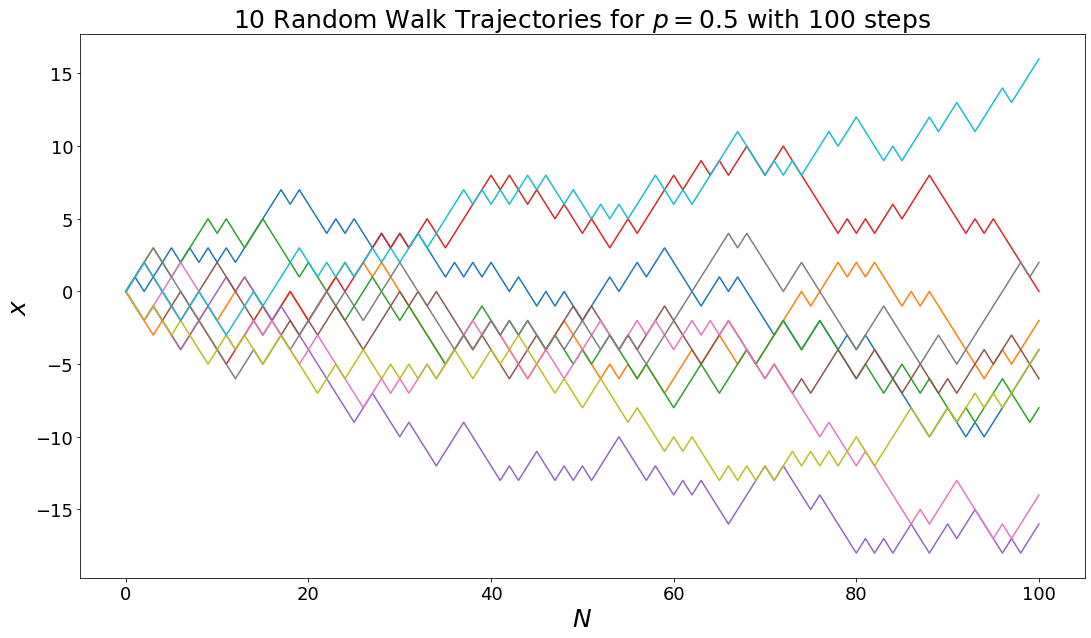

In [10]:
plt.subplots(figsize=(18, 10))
param_dict = {
    'nsteps': 100, 
    'ntrials': 1000, 
    'p': 0.5,
    }
walk_1d = RandomWalk1D(**param_dict)
x_arr, _, _, _ = walk_1d.monte_carlo()
for i in range(10):
    plt.plot(range(len(x_arr[i,:])), x_arr[i,:])

plt.xlabel(r'$N$', fontsize = 25)
plt.ylabel(r'$x$', fontsize = 25)
plt.title(r'10 Random Walk Trajectories for $p=0.5$ with 100 steps', fontsize = 25)
plt.savefig('../img/fig.png')
plt.savefig('../img/fig.pdf')
plt.show()

## 2A. Mean-Squared Displacement 

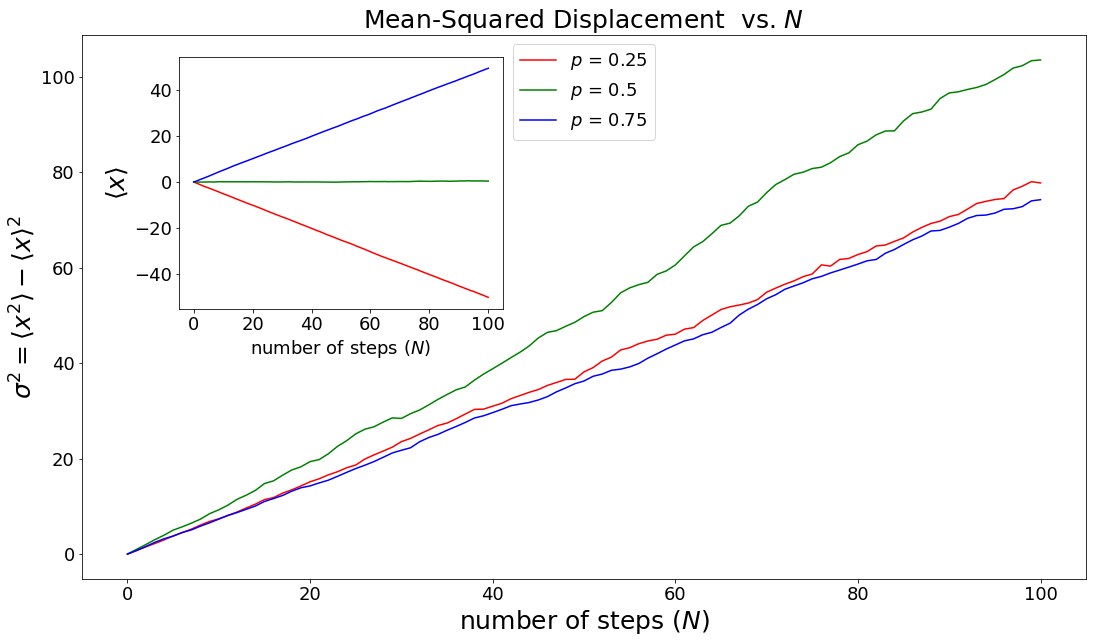

In [11]:
# figure layout
fig, ax1 = plt.subplots(figsize=(18, 10))
left, bottom, width, height = [0.2,0.5,0.25,0.35]
ax2 = fig.add_axes([left, bottom, width, height])

color = ['r', 'g', 'b']
prob = [0.25, 0.5, 0.75]
for i in range(len(prob)):
    param_dict = {
    'nsteps': 100, 
    'ntrials': 1000, 
    'p': prob[i],
    }
    walk_1d = RandomWalk1D(**param_dict)
    _, _, xbar, var_ = walk_1d.monte_carlo()
    ax1.plot(range(len(var_)), var_,label = r"$p$ = {0:.2g}".format(prob[i]),color = color[i])
    ax2.plot(range(len(xbar)), xbar, color = color[i])
ax1.set_xlabel(r'number of steps ($N$)', fontsize = 25)
ax1.set_ylabel(r'$\sigma^2 = \langle x^2\rangle-\langle x\rangle^2$', fontsize = 25)
ax1.set_title(r'Mean-Squared Displacement  vs. $N$', fontsize = 25)
ax1.legend(loc = 'upper center')
ax2.set_xlabel(r'number of steps ($N$)')
ax2.set_ylabel(r'$\langle x\rangle$', fontsize = 25)
plt.savefig('../img/fig1a.png')
plt.savefig('../img/fig1a.pdf')
plt.show()

## 2B. Power-Law Scaling

In [12]:
# extract few values for log-log plot
param_dict = {
    'nsteps': 1000, 
    'ntrials': 100000, 
    'p': 0.5,
    }
walk_1d = RandomWalk1D(**param_dict)
_, _, _, var_ = walk_1d.monte_carlo()
n = [8, 16, 32, 64]
sigma2 = np.zeros(len(n))
for i, val in enumerate(n):
    sigma2[i] = var_[val]

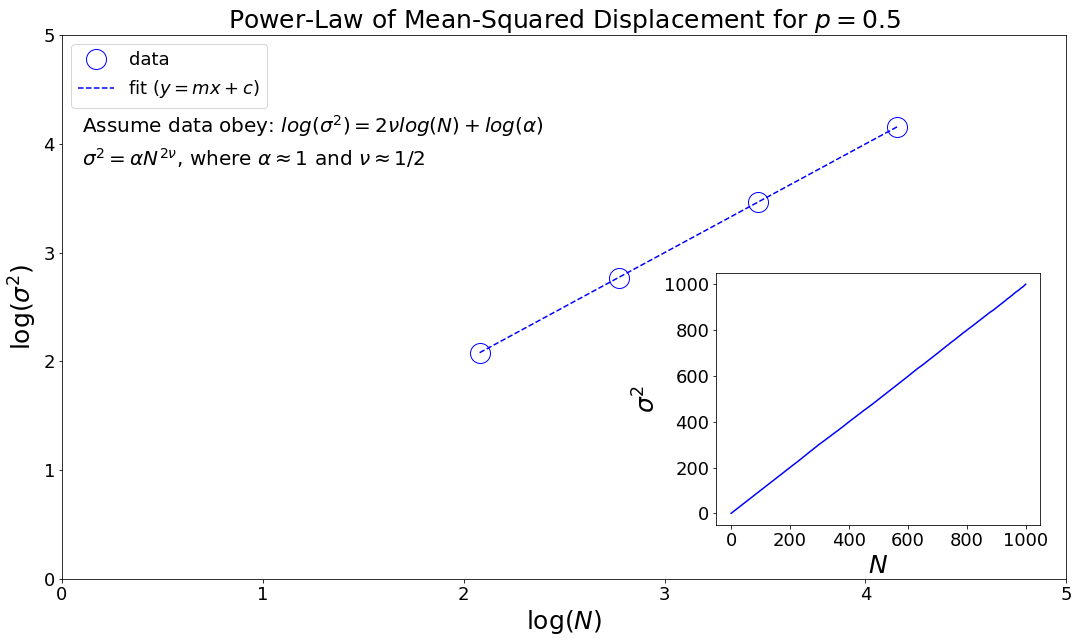

alpha = 1 and nu = 0.5
Diffusion coeffient D = alpha/2 = 0.5


In [13]:
fig, ax1 = plt.subplots(figsize=(18, 10))
left, bottom, width, height = [0.63,0.2,0.25,0.35] 
ax2 = fig.add_axes([left, bottom, width, height])

# plot data
ax1.plot(np.log(n), np.log(sigma2), color = 'b', marker = 'o',linestyle = " ", 
         markersize = 20, markerfacecolor = 'none', label = 'data')
ax2.plot(range(len(var_)), var_, color = 'b')

# fit data
m, c = np.polyfit(np.log(n), np.log(sigma2), 1) # extract slope and intercept
ax1.plot(np.log(n), m*np.log(n) + c,  color = 'b', linestyle = "--", 
         label = r'fit ($y = mx + c$)')

ax1.set_xlim([0,5])
ax1.set_ylim([0,5])
ax1.set_ylabel(r'log($\sigma^2$)', fontsize = 25)
ax1.set_xlabel(r'log($N$)', fontsize = 25)
ax1.set_title(r'Power-Law of Mean-Squared Displacement for $p=0.5$', fontsize = 25)
ax1.text(0.1,4.1, r'Assume data obey: $log(\sigma^2) = 2\nu log(N) + log(\alpha)$', fontsize = 20)
ax1.text(0.1, 3.8, r'$\sigma^2 = \alpha N^{2\nu}$, where $\alpha \approx 1$ and $\nu \approx 1/2$', 
         fontsize = 20)
ax1.legend(loc = 'upper left')
ax2.set_ylabel(r'$\sigma^2$', fontsize = 25)
ax2.set_xlabel(r'$N$', fontsize = 25)
plt.savefig('../img/fig1b.png')
plt.savefig('../img/fig1b.pdf')
plt.show()

#-------------------------------------------------------------#
alpha = np.exp(c)
nu = m/2
print("alpha = {0:.2g} and nu = {1:.2g}".format(alpha, nu))
print("Diffusion coeffient D = alpha/2 = {0:.2g}".format(alpha/2))

## 3. Mean Number of Distinct Sites Visited

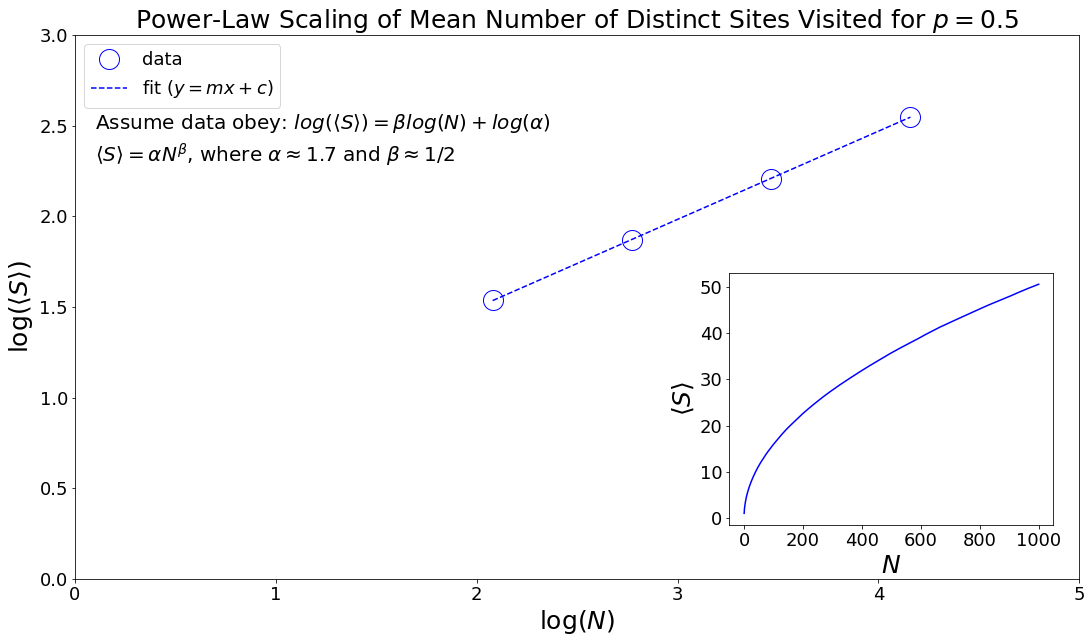

In [14]:
# extract few values for log-log plot
param_dict = {
    'nsteps': 1000, 
    'ntrials': 10000, 
    'p': 0.5,
    }
walk_1d = RandomWalk1D(**param_dict)
res = walk_1d.average_sites_visited()
n = [8, 16, 32, 64]
s = np.zeros(len(n))
for i, val in enumerate(n):
    s[i] = res[val]
    
# figure layout
fig, ax1 = plt.subplots(figsize=(18, 10))
left, bottom, width, height = [0.63,0.2,0.25,0.35] 
ax2 = fig.add_axes([left, bottom, width, height])

# plot data
ax1.plot(np.log(n), np.log(s), color = 'b', marker = 'o', markerfacecolor = 'none',
         linestyle = " ", markersize = 20, label = 'data')
ax2.plot(range(len(res)), res, color = 'b')

# fit data
m, c = np.polyfit(np.log(n), np.log(s), 1) # extract slope and intercept
ax1.plot(np.log(n), m*np.log(n) + c,  color = 'b', linestyle = "--", 
         label = r'fit ($y = mx + c$)')

ax1.set_xlim([0,5])
ax1.set_ylim([0,3])
ax1.set_xlabel(r'log($N$)', fontsize = 25)
ax1.set_ylabel(r'log($\langle S\rangle$)', fontsize = 25)
ax1.set_title(r'Power-Law Scaling of Mean Number of Distinct Sites Visited for $p= 0.5$', fontsize = 25)
ax1.text(0.1,2.48, r'Assume data obey: $log(\langle S\rangle) = \beta log(N) + log(\alpha)$', 
         fontsize = 20)
ax1.text(0.1, 2.3, 
         r'$\langle S\rangle = \alpha N^{\beta}$, where $\alpha \approx 1.7$ and $\beta \approx 1/2$', 
         fontsize = 20)
ax1.legend(loc = 'upper left')
ax2.set_xlabel(r'$N$', fontsize = 25)
ax2.set_ylabel(r'$\langle S\rangle$', fontsize = 25)
plt.savefig('../img/fig2a.png')
plt.savefig('../img/fig2a.pdf')
plt.show()

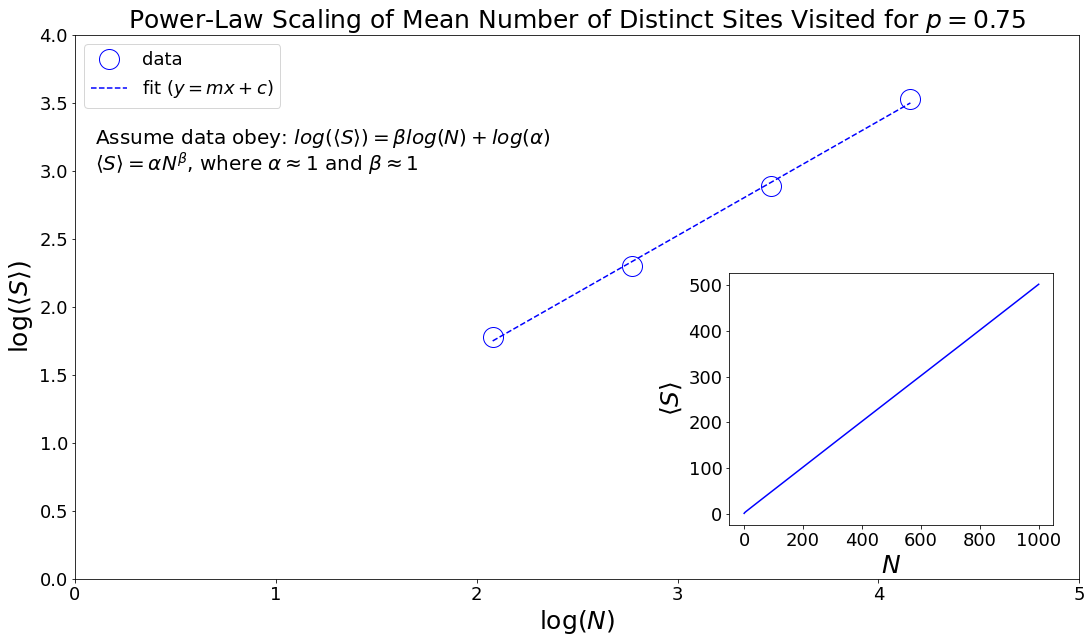

In [15]:
# extract few values for log-log plot
param_dict = {
    'nsteps': 1000, 
    'ntrials': 10000, 
    'p': 0.75,
    }
walk_1d = RandomWalk1D(**param_dict)
res = walk_1d.average_sites_visited()
n = [8, 16, 32, 64]
s = np.zeros(len(n))
for i, val in enumerate(n):
    s[i] = res[val]

# figure layout
fig, ax1 = plt.subplots(figsize=(18, 10))
left, bottom, width, height = [0.63,0.2,0.25,0.35] 
ax2 = fig.add_axes([left, bottom, width, height])

# plot data
ax1.plot(np.log(n), np.log(s), color = 'b', marker = 'o',markerfacecolor = 'none',
         linestyle = " ", markersize = 20, label = 'data')
ax2.plot(range(len(res)), res, color = 'b')

# fit data
m, c = np.polyfit(np.log(n), np.log(s), 1) # extract slope and intercept
ax1.plot(np.log(n), m*np.log(n) + c,  color = 'b', linestyle = "--", 
         label = r'fit ($y = mx + c$)')

ax1.set_xlim([0,5])
ax1.set_ylim([0,4])
ax1.set_xlabel(r'log($N$)', fontsize = 25)
ax1.set_ylabel(r'log($\langle S\rangle$)', fontsize = 25)
ax1.set_title(r'Power-Law Scaling of Mean Number of Distinct Sites Visited for $p= 0.75$', fontsize = 25)
ax1.text(0.1,3.2, r'Assume data obey: $log(\langle S\rangle) = \beta log(N) + log(\alpha)$', 
         fontsize = 20)
ax1.text(0.1, 3, 
         r'$\langle S\rangle = \alpha N^{\beta}$, where $\alpha \approx 1$ and $\beta \approx 1$', 
         fontsize = 20)
ax1.legend(loc = 'upper left')
ax2.set_xlabel(r'$N$', fontsize = 25)
ax2.set_ylabel(r'$\langle S\rangle$', fontsize = 25)
plt.savefig('../img/fig2b.png')
plt.savefig('../img/fig2b.pdf')
plt.show()

## 4. Probability Distribution

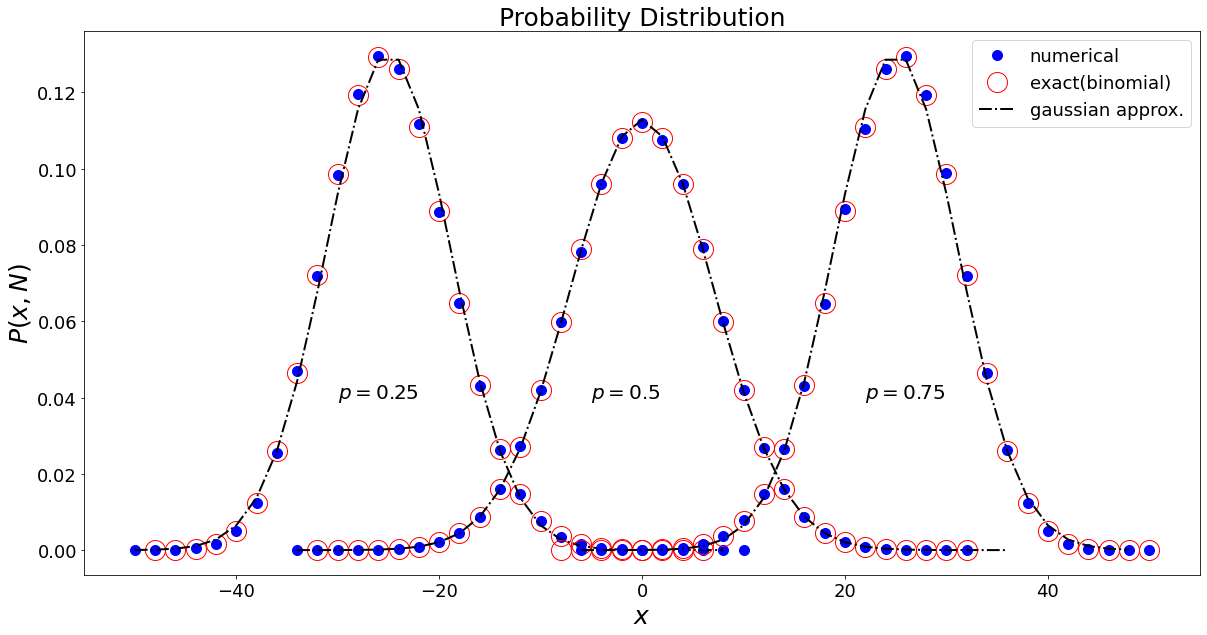

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))

# initialization
nsteps = 50
ntrials = 10**6
const = 2
prob = [0.25, 0.5, 0.75]
label = ['numerical', 'exact(binomial)', 'gaussian approx.']
for i in range(len(prob)):
    param_dict = {
    'nsteps': 50, 
    'ntrials': 10**6, 
    'p': prob[i],
    }
    walk_1d = RandomWalk1D(**param_dict)
    _, hashmap, _, _ = walk_1d.monte_carlo()
    x_pos1, e_dist = walk_1d.exact_dist()
    x_pos2, g_dist = walk_1d.gaussian_approx(const)
    
    # pandas dataframe
    x_dist = pd.DataFrame({'x':hashmap.keys(), 'val1':[x/ntrials for x in hashmap.values()]})
    exact_dist = pd.DataFrame({'x':x_pos1, 'val2':e_dist})
    gau_dist = pd.DataFrame({'x':x_pos2, 'val3':g_dist})
    
    # group by
    x_dist = x_dist.groupby(['x']).mean()
    exact_dist = exact_dist.groupby(['x']).mean()
    gau_dist = gau_dist.groupby(['x']).mean()

    # plot figures
    pd.Series(x_dist.val1, index = x_dist.index).plot(ax = ax,color = 'b',marker = 'o', 
                                  linestyle = " ", markersize = 10, label = label[0])
    
    pd.Series(exact_dist.val2, index = exact_dist.index).plot(ax = ax, color = 'r',
                                                             marker = 'o', markerfacecolor = 'none',
                                                            linestyle = " ", 
                                                             markersize = 20, 
                                                             label = label[1])
    pd.Series(gau_dist.val3, index = gau_dist.index).plot(ax = ax,linewidth = 2,  color = 'k',
                                  linestyle = "-.", label = label[2])
    if i == 0:
        plt.legend(loc = 'best')
    
plt.xlabel(r'$x$', fontsize = 25)
plt.ylabel(r'$P(x,N)$', fontsize = 25)
plt.text(-30, 0.04, r'$p = 0.25$', fontsize = 20)
plt.text(-5, 0.04, r'$p = 0.5$', fontsize = 20)
plt.text(22, 0.04, r'$p = 0.75$', fontsize = 20)
plt.title(r'Probability Distribution', fontsize = 25)
plt.savefig('../img/fig3.png')
plt.savefig('../img/fig3.pdf')
plt.show()